In [1]:
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
from keras.datasets import mnist 
(x_train ,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# x_train = x_train.astype("float32")
# x_test = x_test.astype("float32")

5
(60000, 28, 28) 60000


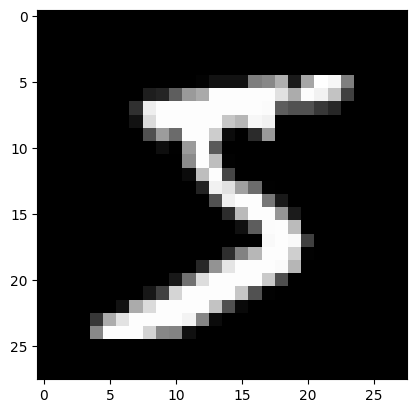

In [4]:
#display 
print(y_train[0])
plt.imshow(x_train[0],cmap='gray')
print(x_train.shape,y_train.shape[0])


Chuẩn hóa input 

In [5]:

x_train_scaled = np.array([x.ravel()/255. for x in x_train ])
x_test_scaled = np.array([x.ravel()/255. for x in x_test ])

x_train_scaled.shape,x_test_scaled.shape


((60000, 784), (10000, 784))

Chuẩn hóa output


In [6]:
def one_hot_encode(y, num_class):
  y_onehot = np.zeros((y.shape[0], num_class))
  for i, label in enumerate(y):
    y_onehot[i][label] = 1 
  return y_onehot

In [7]:
y_train_onehot = one_hot_encode(y_train.reshape(-1,1),10)
y_test_onehot = one_hot_encode(y_test.reshape(-1,1),10)

In [8]:
print(y_train_onehot[0])
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


Xây dựng và huấn luyện mô hình 

Mô hình dự đoán

In [10]:
def predict(x,w):
  h=np.dot(x,w)
  softmax = np.exp(h)
  y_pred = softmax/np.sum(softmax,axis = 1 , keepdims = True)
  return y_pred 

Hàm loss

In [11]:
def loss(x,y,w):
  y_pred = predict(x,w)
  return -np.sum(y*np.log(y_pred+0.01))/y.shape[0]


Hàm Gradient

In [12]:
def grad(x,w,y):
  y_pred = predict(x,w)
  delta = y_pred-y
  return np.dot(x.T,delta)/x.shape[0]

Hàm Gradient Descent 

In [13]:
def fit(x,y,lr,epochs):
    w = np.zeros((x.shape[1],10))
    l = loss(x,y,w)
    print("first loss = " ,l)
    l = [] 
    for i in range(epochs):
      dw = grad(x,w,y) 
      w -= lr*dw
      a = loss(x,y,w)
      l.append(a)
    print("final loss = " , a )
    return l,w


In [14]:
l,w = fit(x_train_scaled,y_train_onehot,0.1,1000)

first loss =  2.2072749131897207
final loss =  0.31930575376073445


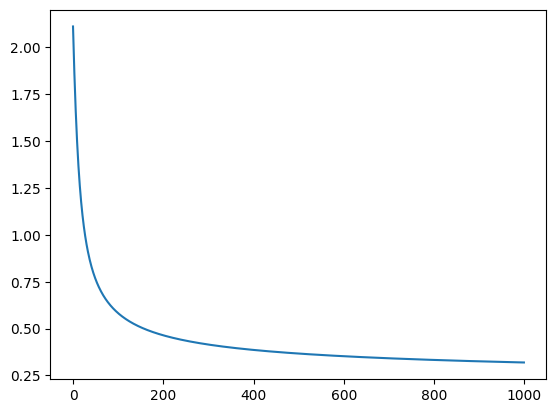

In [15]:
plt.plot(l)

Đánh giá mô hình 

In [16]:
# Chuyển về dạng số thực 

def predict_classes(x,w):
  y_pred = predict(x,w)
  y_pred = np.argmax(y_pred,axis=1)
  return y_pred

In [17]:
def evaluation(y_true, y_pred):
    tp = 0
    tn = 0 
    fp = 0 
    fn = 0 
    for i in range(len(y_true)):
        if(y_true[i] == y_pred[i]):
            if(y_pred[i] == 1):
                tp += 1
            else:
                tn += 1
        else:
            if(y_pred[i] == 1):
                fp += 1
            else:
                fn += 1
    accuracy = (tp + tn) / (tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*accuracy/(precision+accuracy)

    print("Accuracy = ",accuracy )
    print("Precision = ",precision )
    print("Recall = ",recall )
    print("f1_score = ",f1_score )

    

In [18]:
y_pred = predict_classes(x_test_scaled,w)
evaluation(y_test,y_pred)

Accuracy =  0.9082
Precision =  0.9550173010380623
Recall =  0.5604060913705584
f1_score =  0.9310204583432535


Visualization Confusion Matrix

***Class Multiclass Logistic***

In [32]:
class Multiclass:
  def __init__(self,lr,epochs):
    self.lr = lr 
    self.epochs = epochs 
      

  def softmax(self,z):
    return np.exp(z)/np.sum(np.exp(z),axis = 1,keepdims=True)
    
  # predict
  def predict(self,x,w):
    z = np.dot(x,w) 
    return self.softmax(z)
  #loss
  def loss(self,x,y,w):
    y_pred = self.predict(x,w)
    return -np.sum(y*np.log(y_pred))/y.shape[0]

  #grad
  def grad(self,x,y,w):
    y_pred = self.predict(x,w)
    delta = y_pred-y
    dw = np.dot(x.T,delta)/x.shape[0]
    return dw
  
  def fit(self,x,y):
    #bias = np.ones((x.shape[0], 1))    #Add bias at first col of X_train
    #x = np.hstack((bias, x))

    w = np.zeros((x.shape[1],10))
    print("first loss = ",self.loss(x,y,w))
    l=[]
    for i in range(self.epochs):
      w -= self.lr*self.grad(x,y,w)
      a = self.loss(x,y,w)
      l.append(a)
    print("final loss = ",a)
    return l,w



In [33]:
model = Multiclass(0.1,1000)


In [35]:
l,w_model = model.fit(x_train_scaled,y_train_onehot)

first loss =  2.3025850929940437
final loss =  0.3516331169238181


In [37]:
y_pred_model =predict_classes(x_test_scaled,w_model)

In [38]:

evaluation(y_test,y_pred_model)

Accuracy =  0.9082
Precision =  0.9550173010380623
Recall =  0.5604060913705584
f1_score =  0.9310204583432535


Ex3 : Logistic add bias 

In [39]:
class LogisticRegression_bias:
    def __init__(self, lr=0.01, epochs=1000, add_bias=True):
        self.lr = lr
        self.epochs = epochs
        self.add_bias = add_bias
    def addBias(self, X):
        return np.hstack((np.ones((X.shape[0], 1)), X))
    def softmax(self, z):
        return np.exp(z)/np.sum(np.exp(z), axis=1, keepdims=True)
    def predict(self, X, w):
        z = np.dot(X, w)
        return self.softmax(z)
    def loss(self, X, y, w):
        y_hat = self.predict(X, w)
        return -np.sum(y*np.log(y_hat))/y.shape[0]
    def grad(self, X, y, w):
        y_hat = self.predict(X, w)
        dw = np.dot(X.T, y_hat-y) / X.shape[0]
        return dw
    def gradient_descent(self, X, y):
        if self.add_bias:
            X = self.addBias(X)
        w = np.zeros((X.shape[1], y.shape[1]))
        loss_his = []
        for i in range(self.epochs):
            w = w - self.lr*self.grad(X, y, w)
            loss_his.append(self.loss(X, y, w))
        print(f"Loss Cross Entropy : {self.loss(X, y, w)}")
        return loss_his, w

In [40]:
model_bias = LogisticRegression_bias() 

In [42]:
loss_model_bias , w_model_bias = model_bias.gradient_descent(x_train_scaled, y_train_onehot)

Loss Cross Entropy : 0.6101643019020809


In [45]:
x_test_bias = model_bias.addBias(x_test_scaled)
y_pred_bias = model_bias.predict(x_test_bias,w_model_bias)
y_pred_bias = np.argmax(y_pred_bias,axis=1)
evaluation(y_test,y_pred_model)

Accuracy =  0.9082
Precision =  0.9550173010380623
Recall =  0.5604060913705584
f1_score =  0.9310204583432535


In [46]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    # sns.heatmap(cm, cmap='Blues',annot=True)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.show()
    


In [20]:
labels = [0,1,2,3,4,5,6,7,8,9]

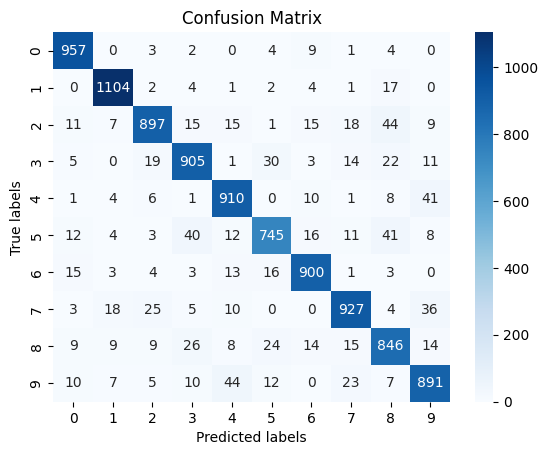

In [21]:
plot_confusion_matrix(y_test,y_pred,labels)